## Men athletes from Europe Regionals 2018 Data exploring

In [ ]:
# import pandas as pd
#Create DataFrame from file containing men athletes from Europe Regionals 2018
athletesMen = pd.read_csv("Data/athletesMen.csv",sep=';',na_values = ['--'],index_col='CompetitorId');

In [9]:
athletesMen.head()

,CompetitorName,FirstName,LastName,Gender,Age,CountryCode,RegionId,RegionalName,Profession,Height_cm,...,Snatch_kg,DeadLift_kg,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m,Rn5k
CompetitorId,,,,,,,,,,,,,,,,,,,,,
975774,Roman Khrennikov,Roman,Khrennikov,M,23,RU,22,Europe,0,182.0,...,99.79024,209.55951,NaN,50.0,2:45,1:50,NaN,NaN,NaN,NaN
698182,Adrian Mundwiler,Adrian,Mundwiler,M,25,DE,22,Europe,0,171.0,...,140.00000,240.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24309,Lukas Högberg,Lukas,Högberg,M,27,SE,22,Europe,0,183.0,...,130.00000,243.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92567,Andrey Ganin,Andrey,Ganin,M,34,RU,22,Europe,0,185.0,...,130.00000,260.00000,NaN,63.0,2:13,NaN,NaN,NaN,0:57,18:55
81616,Björgvin Karl Guðmundsson,Björgvin Karl,Guðmundsson,M,25,IS,22,Europe,0,178.0,...,129.72731,235.86784,NaN,65.0,2:23,2:00,NaN,NaN,NaN,19:20


In [91]:
%matplotlib inline
#Create DataFrame for identification of country names
labels = ['CountryCode','Country']
codeToCountryList=[('AT','Austria'),
                  ('DE','Germany'),
                  ('DK','Denmark'),
                  ('GB','United Kingdom'),
                  ('GR','Greece'),
                  ('IE','Ireland'),
                  ('IS','Iceland'),
                  ('LV','Latvia'),
                  ('PL','Poland'),
                  ('RS','Serbia'),
                  ('RU','Russia'),
                  ('SE','Sweden')]

countryCodeDF = pd.DataFrame.from_records(codeToCountryList,columns=labels)
#Create DataFrame with number of athletes by country-code
byCountry = athletesMen.groupby('CountryCode')['CompetitorName'].count().reset_index(name ='Athletes on Regionals')
#Create DataFrame with number of athletes by country-code and country name
byCountry=pd.merge(countryCodeDF,byCountry,on='CountryCode')
byCountry

,CountryCode,Country,Athletes on Regionals
0,AT,Austria,1
1,DE,Germany,5
2,DK,Denmark,3
3,GB,United Kingdom,7
4,GR,Greece,4
5,IE,Ireland,2
6,IS,Iceland,4
7,LV,Latvia,1
8,PL,Poland,5
9,RS,Serbia,1


In [92]:
toTheGames = athletesMen.iloc[:5].groupby('CountryCode')['CompetitorName'].count().reset_index(name='Athletes going to The Games')
toTheGames = pd.merge(byCountry,toTheGames,on='CountryCode',how='left').fillna(0)
toTheGames

,CountryCode,Country,Athletes on Regionals,Athletes going to The Games
0,AT,Austria,1,0.0
1,DE,Germany,5,1.0
2,DK,Denmark,3,0.0
3,GB,United Kingdom,7,0.0
4,GR,Greece,4,0.0
5,IE,Ireland,2,0.0
6,IS,Iceland,4,1.0
7,LV,Latvia,1,0.0
8,PL,Poland,5,0.0
9,RS,Serbia,1,0.0


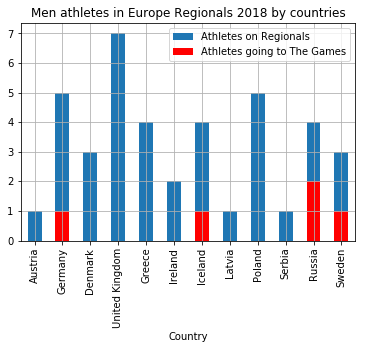

In [93]:
ax = toTheGames.plot(x="Country",y="Athletes on Regionals",kind="bar",grid=True)
toTheGames.plot(x="Country",y="Athletes going to The Games",ax=ax,kind="bar",color="red",grid=True)
ax.set_title("Men athletes in Europe Regionals 2018 by countries")

In [106]:
# Avarage body parameters for man athlete on Europe Regionals 2018
avarageAge = round(athletesMen.Age.mean())
avarageHeight = round(athletesMen.Height_cm.mean())
avarageWeight = round(athletesMen.Weight_kg.mean())
avarageAthlete = {"Age": avarageAge,
                  "Height_cm":avarageHeight,
                 "Weight_kg":avarageWeight}
avarageAthlete

{'Age': 27, 'Height_cm': 178, 'Weight_kg': 89}

In [104]:
# Avarage strength parameters for man athlete on Europe Regionals 2018
avarageBackSquat_kg = round(athletesMen.BackSquat_kg.mean())
avarageCleanAndJerk_kg = round(athletesMen.CleanAndJerk_kg.mean())
avarageSnatch_kg = round(athletesMen.Snatch_kg.mean())
avarageDeadLift_kg = round(athletesMen.DeadLift_kg.mean())

avarageStrength = {"BackSquat_kg": avarageBackSquat_kg,
                  "CleanAndJerk_kg":avarageCleanAndJerk_kg,
                 "Snatch_kg":avarageSnatch_kg,
                   "DeadLift_kg":avarageDeadLift_kg}
avarageStrength

{'BackSquat_kg': 204,
 'CleanAndJerk_kg': 150,
 'DeadLift_kg': 233,
 'Snatch_kg': 121}

In [132]:
# Count avarage stranght parameters by weight range:
# 1.Select columns with atheletes weight and strenght parameters
weightAndStranght = round(athletesMen[['Weight_kg','BackSquat_kg', 'CleanAndJerk_kg', 'Snatch_kg',
       'DeadLift_kg']])
# 2.Assign every weight to weight range (range(75,110,5))
weightAndStranght['Weight_range'] = pd.cut(weightAndStranght.Weight_kg,range(75,110,5), include_lowest=True)
# 3. Now we don't need individual weights, let's drop that column
weightAndStranght=weightAndStranght.drop('Weight_kg',axis=1)
# 4. Groub by ranges and count avarage value for every strenght parameter
weightAndStranght = round(weightAndStranght.groupby('Weight_range').mean())
weightAndStranght

,BackSquat_kg,CleanAndJerk_kg,Snatch_kg,DeadLift_kg
Weight_range,,,,
"[75, 80]",192.0,138.0,112.0,220.0
"(80, 85]",207.0,150.0,122.0,224.0
"(85, 90]",199.0,151.0,120.0,236.0
"(90, 95]",214.0,154.0,124.0,252.0
"(95, 100]",203.0,148.0,118.0,224.0
"(100, 105]",200.0,151.0,130.0,260.0
